In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [11]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bcfc2828>,
      dtype=object)

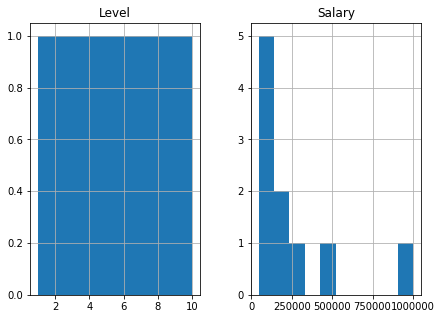

In [12]:
dataset.hist(figsize = (7,5))

In [13]:
#spliting data in label and features
X = dataset.iloc[:, 1:2].values
#dependent variable is a vector
y = dataset.iloc[:, 2].values

In [14]:
# Fitting Linear Regression to the dataset for comparison purposes
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Fitting Polynomial Regression to the dataset
# This is just linear regression with PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
#set the maximum degree to use in the model
poly_reg = PolynomialFeatures(degree = 4)
#transform the feature matrix to introduce the derived polynomial features (each is Level raised to a higher power)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

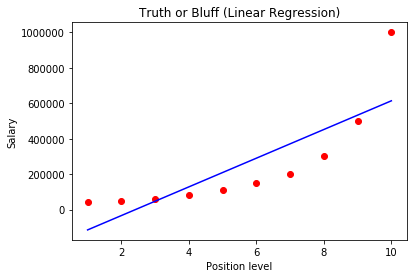

In [16]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

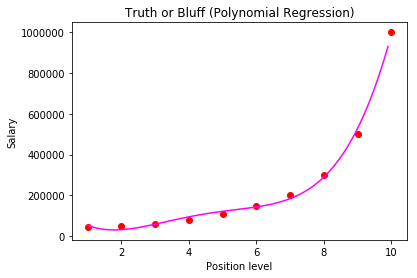

In [20]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'magenta')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()